# Introduction

The clustering methods are frequently applied in marketing fields. Marketing companies need unsupervised learning to find patterns behind the customer preferences.

In this tab, three clustering methods will be used, namely, KMEANS++, DBSCAN,Agglomerative Clustering. These methods are selected from density clustering, Hierachical Clustering, Partitioning Method.

The numbers of clusters are computed based on elbow method, Silhouette Score and empirical methods like plotting dendrogram. Principal Component Analysis is used to decompose the data into 2D to visualize.

# Clustering Method

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
# read the csv file
df = pd.read_csv('../../data/hate_speech.csv',index_col=0)
# only use the numerical data
df = df.loc[:,['id','follower_count','friends_count','retweet_count','favorite_count','word_length','label']]
df.rename({'id':'timestamp'},axis=1,inplace=True)
df.head(5)

,timestamp,follower_count,friends_count,retweet_count,favorite_count,word_length,label
0,13857342,20161,780,0,0,10,0
1,13857342,20161,780,0,4,13,0
2,82522377,4,64,0,1,15,1
3,13857342,20161,780,1,30,11,0
4,930620467,18807,263,0,0,11,0


# Feature Engineering

In [3]:
x = df.drop(columns='label')
y = df.label
model = StandardScaler()
x_scaled = model.fit_transform(x)
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(x_scaled)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
x = X_principal.values

# Evaluation Method

## Elbow Method

In [5]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
kmeans_kwargs = {
    "init":"k-means++",
    "random_state":42
}
sse = []
distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
evaluation = pd.DataFrame.from_records({'cluster':np.arange(1,i+1),'Inertia':sse,'distortions':distortions})
X_principal.loc[:,'label'] = df.label
evaluation.plot.line(x = 'cluster',subplots=True,title='Elbow Method')

,Inertia,cluster,distortions
0,8712.494712,1,1.142817
1,6087.019768,2,0.904794
2,4676.381476,3,0.893993
3,3434.406219,4,0.706254
4,2574.717059,5,0.649922
5,2086.901738,6,0.629156
6,1748.605447,7,0.546182
7,1497.128242,8,0.485381
8,1268.510072,9,0.448680
9,1140.034594,10,0.411454


## Silhouette Score

In [ ]:
epsilon = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.25,1.5,1.75, 2,2.25,2.5,2.75, 3,3.25,3.5,3.75, 4]
min_samples = [10,15,20,25]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(x)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = silhouette_score(x, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

# K-means ++ 

Text(0.5, 1.0, 'Kmeans')

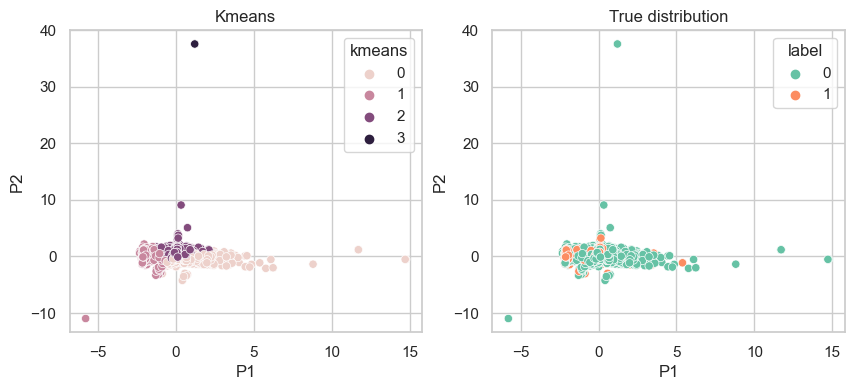

In [16]:
sns.set_theme(style='whitegrid',palette='Set2')
bestk = KMeans(n_clusters=4,**kmeans_kwargs)
kmeans = bestk.fit_predict(x)
X_principal.loc[:,'kmeans'] = kmeans
fig,axes = plt.subplots(1,2,figsize=(10,4),dpi=100)
sns.scatterplot(X_principal,x='P1',y='P2',hue='kmeans',ax=axes[0])
sns.scatterplot(X_principal,x='P1',y='P2',hue ='label', ax=axes[1])
axes[1].set_title('True distribution')
axes[0].set_title('Kmeans')


# DBSCAN

Text(0.5, 1.0, 'DBSCAN')

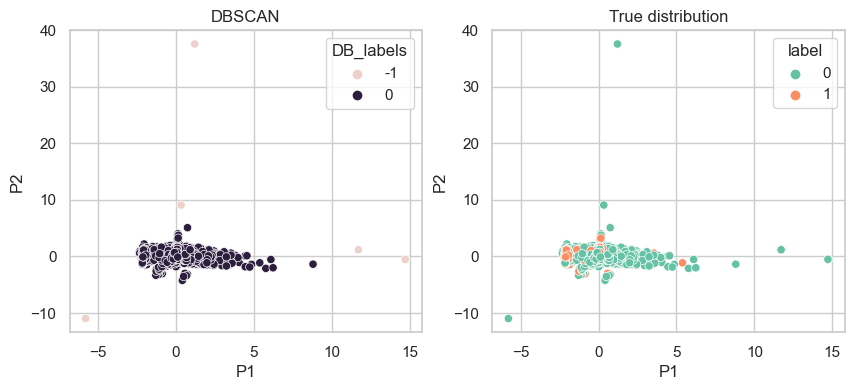

In [18]:
# DBSCAN density clustering method
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
DB = DBSCAN(eps=2.75,min_samples=10).fit(x)
DB_labels = DB.labels_
X_principal.loc[:,'DB_labels'] = DB_labels
fig,axes = plt.subplots(1,2,figsize=(10,4),dpi=100)
sns.scatterplot(X_principal,x='P1',y='P2',hue='DB_labels',ax=axes[0])
sns.scatterplot(X_principal,x='P1',y='P2',hue ='label', ax=axes[1])
axes[1].set_title('True distribution')
axes[0].set_title('DBSCAN')

# Agglomerative Clustering

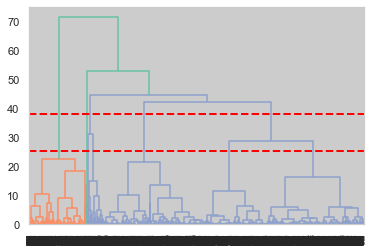

In [11]:
tree = dendrogram(linkage(x, method='ward'))
plt.axhline(y=25.5,color = 'r',linestyle='--',linewidth=2)
plt.axhline(y=38,color = 'r',linestyle='--',linewidth=2)

Text(0.5, 1.0, 'AgglomerativeClustering')

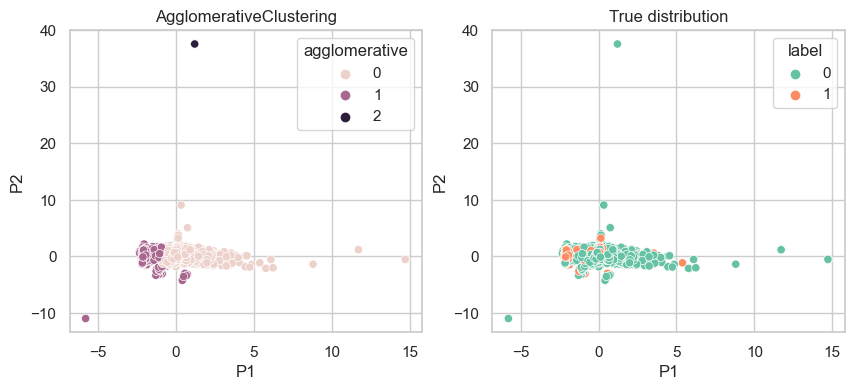

In [12]:
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg.fit(x)
labels = agg.labels_
X_principal.loc[:,'agglomerative'] = labels
fig,axes = plt.subplots(1,2,figsize=(10,4),dpi=100)
sns.scatterplot(X_principal,x='P1',y='P2',hue='agglomerative',ax=axes[0])
sns.scatterplot(X_principal,x='P1',y='P2',hue ='label', ax=axes[1])
axes[1].set_title('True distribution')
axes[0].set_title('AgglomerativeClustering')

# Conclusion

In this tab, we have used three separate clustering model with the best hyperparameters to conduct unsupervised learning. 

The potential association underneath the dataset derived from the Unsupervised learning is hard to explanable sometimes especially once the data is normalized and decomposed into 2D.

Among the three methods, the k-means cluters the whole dataset into 4 groups in terms of the six numerical variables as Followers counts, Favorite Counts, Retweet Counts, etc. 

One of the highlight worth mentioned is that the K-means++ method is the best among this three if evaluated by the true distribution of the y label. It can to some extent, be similar to the actual cyberviolence distribution in the text. However, how the distribution of the 6 features vary and therefore influcing the prediction of hate speech is still unknown.


# Reference

[1] Shaik, J. (2020, September 18). Practical implementation of K-means, hierarchical, and DBSCAN clustering on dataset with… Medium. Retrieved November 13, 2022, from https://medium.com/analytics-vidhya/practical-implementation-of-k-means-hierarchical-and-dbscan-clustering-on-dataset-with-bd7f3d13ef7f

[2] Prado, K. S. do. (2019, June 3). How DBSCAN works and why should we use it? Medium. Retrieved December 8, 2022, from https://medium.com/towards-data-science/how-dbscan-works-and-why-should-i-use-it-443b4a191c80 

[3] Baruah, I. D. (2021, July 21). Cheat sheet for implementing 7 methods for selecting the optimal number of clusters in Python. Medium. Retrieved December 8, 2022, from https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad 